In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
data = pd.read_csv('/content/Student_Performance.csv')

In [3]:
# Display the first few rows of the dataset for initial inspection
data.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [4]:
# Get the dimensions of the dataset (number of rows and columns)
data.shape

(10000, 6)

In [5]:
# Get a concise summary of the dataset, including data types and non-null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [6]:
# Convert the 'Extracurricular Activities' column from categorical (Yes/No) to numerical (1/0)
# This is important for linear regression models as they work with numerical data
data['Extracurricular Activities'] = data['Extracurricular Activities'].map({'Yes':1, 'No':0})
data.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0


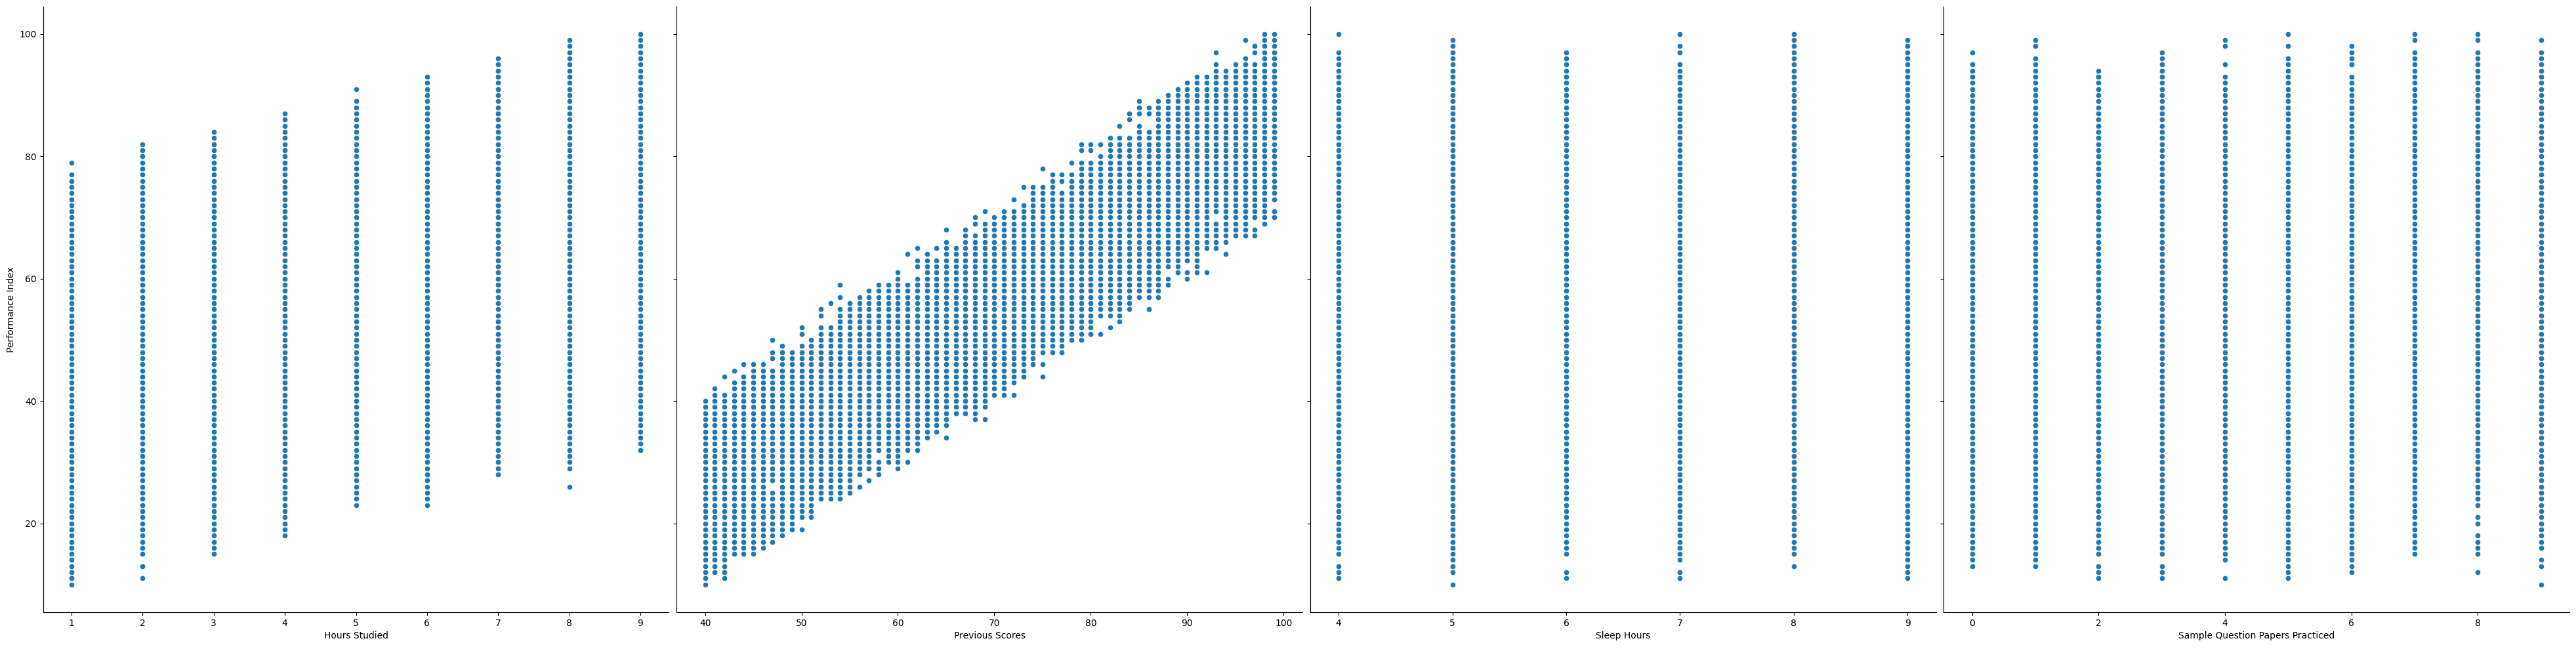

In [7]:
# Visualize pairwise relationships between features and the target variable ('Performance Index')
# This helps in understanding correlations and potential patterns in the data
sns.pairplot(data,y_vars='Performance Index',
             x_vars=data.columns.drop(['Performance Index','Extracurricular Activities']),
             height=10)
plt.show()


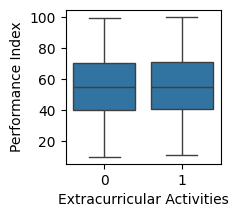

In [8]:
# Visualize the distribution of 'Performance Index' for each category of 'Extracurricular Activities' using a box plot
# This helps in comparing the performance of students with and without extracurricular activities
plt.figure(figsize=(2,2))
sns.boxplot(x='Extracurricular Activities',data=data, y='Performance Index')
plt.show()

*The boxplot illustrates the distribution of the Performance Index for students with and without participation in extracurricular activities. The median Performance Index is similar for both groups, indicating that participation in extracurricular activities does not appear to significantly influence the Performance Index in this dataset. The spread and range of the data are also comparable, suggesting consistent variability in performance among both groups.*

In [9]:
# Feature Scaling: Normalize the features to have zero mean and unit variance
# This improves the performance and convergence speed of gradient descent
data = (data - data.mean())/data.std()
print('Data After Normalization \n', data.head())

Data After Normalization 
    Hours Studied  Previous Scores  Extracurricular Activities  Sleep Hours  \
0       0.775149         1.704090                    1.010404     1.456132   
1      -0.383461         0.723876                   -0.989604    -1.492220   
2       1.161352        -1.063573                    1.010404     0.276791   
3       0.002742        -1.005913                    1.010404    -0.902549   
4       0.775149         0.320259                   -0.989604     0.866462   

   Sample Question Papers Practiced  Performance Index  
0                         -1.249691           1.862074  
1                         -0.900937           0.508792  
2                         -0.900937          -0.532194  
3                         -0.900937          -1.000637  
4                          0.145326           0.560842  


In [10]:
# Add a column of ones for the intercept term in the linear regression model
data.insert(0,"Ones",1)

In [11]:
data.head()

,Ones,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,1,0.775149,1.704090,1.010404,1.456132,-1.249691,1.862074
1,1,-0.383461,0.723876,-0.989604,-1.492220,-0.900937,0.508792
2,1,1.161352,-1.063573,1.010404,0.276791,-0.900937,-0.532194
3,1,0.002742,-1.005913,1.010404,-0.902549,-0.900937,-1.000637
4,1,0.775149,0.320259,-0.989604,0.866462,0.145326,0.560842


In [12]:
# Separate features (X) from the target variable (y)
cols = data.shape[1]
X = data.iloc[:,0:cols-1]
y = data.iloc[:,cols-1:cols]

#print('X: \n ',X.head())
#print('Y: \n ', y.head())

In [13]:
# Convert dataframes into matrices for efficient matrix operations
X = np.matrix(X.values)
y = np.matrix(y.values)
weights = np.matrix(np.zeros((1,X.shape[1])))

print('X', X.shape)
print('y', y.shape)
print('weights', weights.shape)

X (10000, 6)
y (10000, 1)
weights (1, 6)


In [14]:
# cost functhion = (1/2m)∑(h(x) - y)^2
# Define the cost function for linear regression (Mean Squared Error)
def compute_cost(X,y,weights):
  m = len(X)  # Number of data points
  predicted = (X * weights.T)  # Predicted values
  cost = np.sum(np.power((predicted - y), 2)) / (2 * m)  # Mean Squared Error
  return cost

In [15]:
# weight(j) = weight(j) -(1/m)∑(h(x) - y)x
# Define the gradient descent function to optimize the model parameters (weights)
def gradient_descent(X, y, weights, learning_rate, iterations):
    temp = np.matrix(np.zeros(weights.shape))  # Temporary matrix to store updated weights
    m = len(X)
    parameters = int(weights.ravel().shape[1])  # Number of parameters (features)
    cost = np.zeros(iterations)  # Array to store cost values for each iteration

    for i in range(iterations):
        error = (X * weights.T) - y  # Difference between predicted and actual values

        # Update each weight using the gradient descent formula
        for j in range(parameters):
            term = np.multiply(error, X[:, j])
            temp[0, j] = weights[0, j] - ((learning_rate / m) * np.sum(term))

        weights = temp  # Update weights
        cost[i] = compute_cost(X, y, weights)  # Calculate cost for the current iteration

    return weights, cost

In [16]:
# Initialize learning rate and number of iterations for gradient descent
learning_rate = 0.25
iterations = 130

In [17]:
# Perform gradient descent to find the optimal weights
GD_weights, cost = gradient_descent(X,y,weights,learning_rate,iterations)
print(GD_weights)
print(cost[0:50])
print('*************************************************************************')
print(cost[905:1000])
print('Final Cost using GD: ',compute_cost(X,y,GD_weights))

[[-5.39124301e-17  3.84501200e-01  9.19339290e-01  1.59503770e-02
   4.24182717e-02  2.89236936e-02]]
[0.28497386 0.16351562 0.09488154 0.05609073 0.034163   0.0217655
 0.01475498 0.01079    0.00854711 0.00727814 0.00656008 0.00615368
 0.00592363 0.00579339 0.00571964 0.00567787 0.00565421 0.00564081
 0.00563321 0.00562891 0.00562647 0.00562508 0.0056243  0.00562385
 0.0056236  0.00562346 0.00562338 0.00562333 0.00562331 0.00562329
 0.00562328 0.00562328 0.00562327 0.00562327 0.00562327 0.00562327
 0.00562327 0.00562327 0.00562327 0.00562327 0.00562327 0.00562327
 0.00562327 0.00562327 0.00562327 0.00562327 0.00562327 0.00562327
 0.00562327 0.00562327]
*************************************************************************
[]
Final Cost using GD:  0.005623271427570989


In [18]:
0.005623271427570989

0.005623271427570989

Text(0.5, 1.0, 'Error vs. Training Epoch')

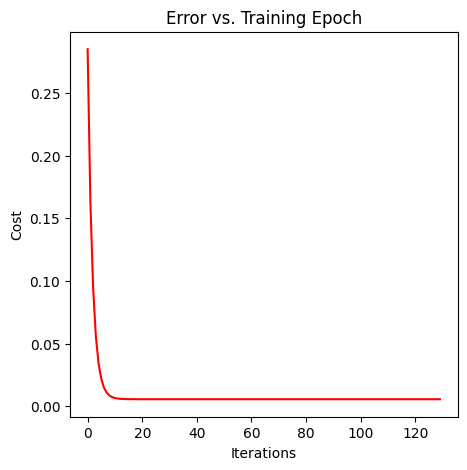

In [19]:
# draw error graph
fig, ax = plt.subplots(figsize=(5,5))
ax.plot(np.arange(iterations), cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')

In [20]:
# optimum_weights = (XT * X)^(-1)*XT*y
def compute_normal_equation(X,y):
  first = np.linalg.inv(np.dot(X.T,X))
  second = np.dot(X.T,y)
  return np.dot(first,second)

In [21]:
# Calculate the optimum weights using normal equation
optimum_weights = compute_normal_equation(X,y).T
print(optimum_weights)

[[-3.25611612e-17  3.84501200e-01  9.19339290e-01  1.59503770e-02
   4.24182717e-02  2.89236936e-02]]


In [22]:
print('Cost using Normal Equation: ',compute_cost(X,y,optimum_weights))
print('Cost using Gradient Descent: ',compute_cost(X,y,GD_weights))

Cost using Normal Equation:  0.005623271427570989
Cost using Gradient Descent:  0.005623271427570989


*After approximately 130 iterations of the Gradient Descent algorithm, with learning rate 0.25, the model converged to the optimum weights.*




Text(0.5, 1.0, 'Best Fit Line:  Performance of the student Vs. Hours Studied')

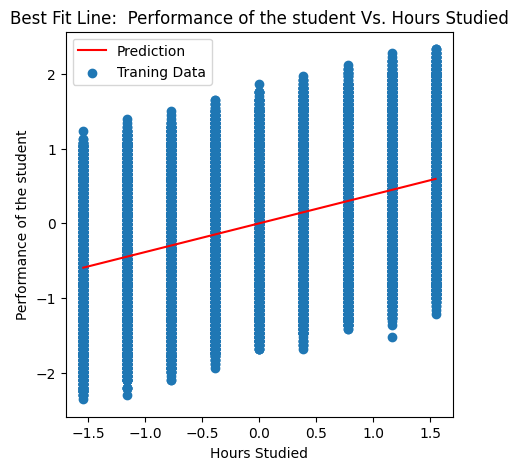

In [23]:
# Get best fit line using Gradient Descent
x = np.linspace(data['Hours Studied'].min(),data['Hours Studied'].max(),100)
f = GD_weights[0,0] + (GD_weights[0,1] * x)

# Draw the line (between Hours Studied and Performance Index)
fig, ax = plt.subplots(figsize=(5,5))
ax.plot(x,f,'r',label='Prediction')
ax.scatter(data['Hours Studied'],data['Performance Index'],label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Hours Studied')
ax.set_ylabel('Performance of the student')
ax.set_title('Best Fit Line:  Performance of the student Vs. Hours Studied')

Text(0.5, 1.0, 'Best Fit Line:  Performance of the student Vs. Previous Scores')

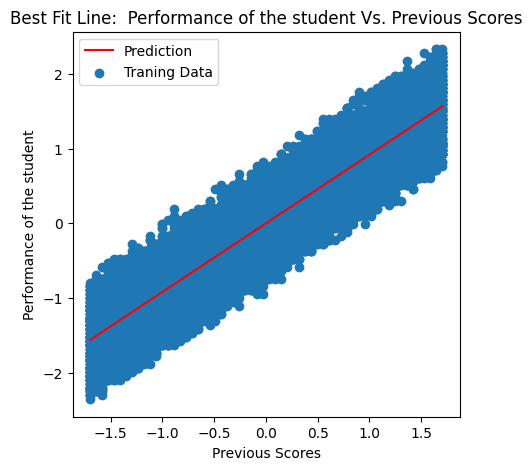

In [27]:
# Get best fit line using Gradient Descent
x = np.linspace(data['Previous Scores'].min(),data['Previous Scores'].max(),100)
f = GD_weights[0,0] + (GD_weights[0,2] * x)

# Draw the line (between Previous Scores and Performance Index)
fig, ax = plt.subplots(figsize=(5,5))
ax.plot(x,f,'r',label='Prediction')
ax.scatter(data['Previous Scores'],data['Performance Index'],label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Previous Scores')
ax.set_ylabel('Performance of the student')
ax.set_title('Best Fit Line:  Performance of the student Vs. Previous Scores')

Text(0.5, 1.0, 'Best Fit Line:  Performance of the student Vs. Sleep Hours')

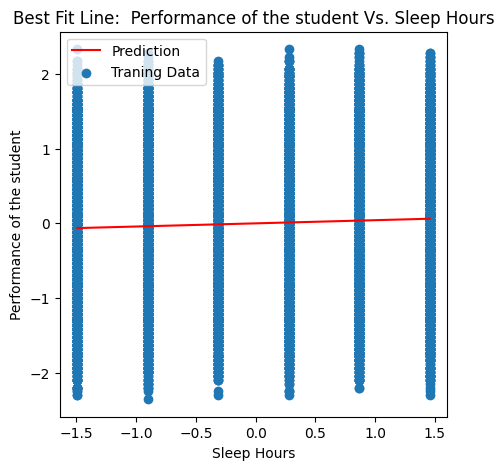

In [28]:
# Get best fit line using Gradient Descent
x = np.linspace(data['Sleep Hours'].min(),data['Sleep Hours'].max(),100)
f = GD_weights[0,0] + (GD_weights[0,4] * x)

# Draw the line (between Sleep Hours and Performance Index)
fig, ax = plt.subplots(figsize=(5,5))
ax.plot(x,f,'r',label='Prediction')
ax.scatter(data['Sleep Hours'],data['Performance Index'],label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Sleep Hours')
ax.set_ylabel('Performance of the student')
ax.set_title('Best Fit Line:  Performance of the student Vs. Sleep Hours')